# **EDA**

## **Import Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## **Data Exploration**

In [36]:
# Dataset Exploration 
resumes_df = pd.read_csv('src/resumes_dataset.csv')
resumes_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [37]:
print("Dataset Shape:\n", resumes_df.shape)
print("\nColumns:\n", resumes_df.columns.tolist())
print("\nMissing Values:\n", resumes_df.isnull().sum())
print("\nStatistical Summary:\n", resumes_df.describe(include='all'))

Dataset Shape:
 (962, 2)

Columns:
 ['Category', 'Resume']

Missing Values:
 Category    0
Resume      0
dtype: int64

Statistical Summary:
               Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18


## **Category Distribution**
Captures no. of unique categories(job roles) and no.of resumes for each category. Also Determines class imbalance.

In [38]:
# Category Distribution
print("Unique Categories:", resumes_df['Category'].nunique())
print(resumes_df['Category'].value_counts())

Unique Categories: 25
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


## **Resume Length Analysis**
To determine which ml algorithm to implement later on.

count     962.000000
mean      450.497921
std       415.868459
min        19.000000
25%       166.000000
50%       329.000000
75%       589.250000
max      2209.000000
Name: text_length, dtype: float64


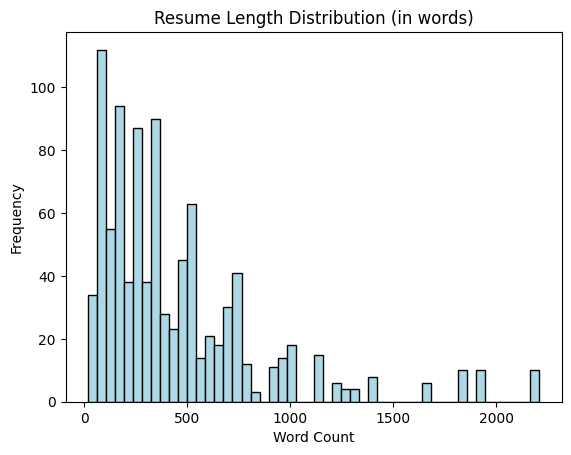

In [39]:
# Resume Length Analysis
resumes_df['text_length'] = resumes_df['Resume'].fillna('').apply(lambda x: len(x.split()))
print(resumes_df['text_length'].describe())

plt.hist(resumes_df['text_length'], bins=50, color='lightblue', edgecolor='black')
plt.title('Resume Length Distribution (in words)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## **Sample Text Preview**
To take a look at sample text and determine strategies for cleaning.

In [40]:
# Sample Text Preview
for i, text in enumerate(resumes_df['Resume'].head(3)): # first 3 resumes from dataset
    print(f"\n---- SAMPLE {i+1} ----\n{text[:500]}") # print first 500 characters of each sample


---- SAMPLE 1 ----
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib

---- SAMPLE 2 ----
Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
AWS- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Sklearn- Exprience - Less than 1 year months
Scipy- Exprience - Less than 1 year months
Keras- Exprience - Less than 1 year monthsCompany Details 
company - Matelabs
descri

## **Insights from EDA before text preprocessing**

- **Dataset Size:** 962 resumes, 2 columns (`Category`, `Resume`), **no missing values**.
- **Job Categories:** 25 total. Imbalance present – top: *Java Developer (84)*, least: *Advocate (20)*.
- **Resume Length:** Most resumes have adequate word count; some may be too short (<50 words) or very long. Created new column `text_length` so now df has 3 columns.
- **Data Quality Observations:**
    - Contains emails, URLs, and special characters (e.g., `NaÃ¯ve` → `Naïve`).
    - Skills are well listed (Python, ML, AWS, Keras, etc.).
    - Headings and redundant info (Education Details, Company Details) are present.
- **Implications for Preprocessing:**
  - Remove emails, URLs, punctuation, stopwords.
  - Normalize text encoding.
  - Apply lemmatization for better token consistency.
- **Model Consideration:** Dataset is relatively small and imbalanced → **TF-IDF + Logistic Regression/Naive Bayes** with `class_weight='balanced'` is suitable.

In [41]:
# save dataframe as pickle file 
with open('src/resumes_df.pkl', 'wb') as f:
    pickle.dump(resumes_df, f)